# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.optimize import minimize

# Configuration

In [7]:
bin_count = 10

# Load data and preview it

In [2]:
# 假設我們有一組數據
data = np.random.normal(loc=2, scale=1, size=100)
dataset = pd.DataFrame(data, columns=['Value'])
dataset.head()


,Value
0,0.841447
1,1.886748
2,2.593211
3,2.136552
4,3.437901


# plot data histogram

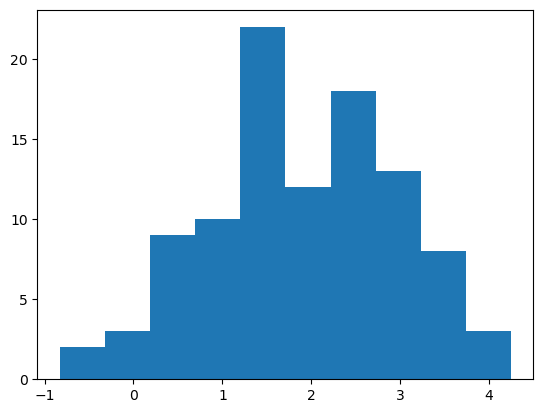

In [8]:
# 使用plt.hist提取直方圖的信息
bin_values, edges_of_bins, patches = plt.hist(dataset['Value'], bins=bin_count, density=False)
bin_centers = (edges_of_bins[:-1] + edges_of_bins[1:]) / 2

# define and list distribution functions for fitting

In [9]:
# 定義高斯分佈的模型函數
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

In [10]:
# 使用curve_fit來擬合高斯分佈
popt, pcov = curve_fit(gauss, bin_centers, bin_values)

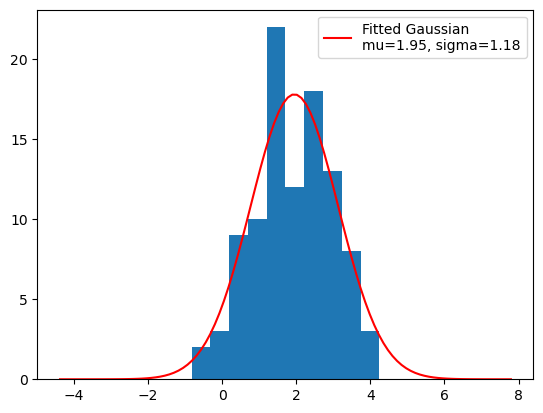

In [11]:
# 獲取擬合參數
A, mu, sigma = popt

# 繪製擬合的高斯分佈
x = np.linspace(min(dataset['Value']) - 3*sigma, max(dataset['Value']) + 3*sigma, 100)
y = gauss(x, A, mu, sigma)

plt.hist(dataset['Value'], bins=bin_count, density=False)
plt.plot(x, y, 'r-', label=f'Fitted Gaussian\nmu={mu:.2f}, sigma={sigma:.2f}')
plt.legend()
plt.show()